# Project 3: Collaboration and Competition

---

In this notebook, we solve a slightly adapted Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

For **TRAINING** the agents, please execute the cells in **Sections 1, 2, 3 and ___4___.**

For **RUNNING** the agents, please execute the cells in **Sections 1, 2, 3 and ___5___.**

### 1. Start the Environment
First, we configure the Jupyter environment and import the necessary packages. If the code below returns an error, please revisit the installation instructions in the project [README.md](https://github.com/hullmann/multiagent-DDPG/blob/master/README.md).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np

from IPython.display import clear_output

import torch

import time
from unityagents import UnityEnvironment
from ddpg_agentx import OUNoise
from collections import namedtuple, deque
import matplotlib.pyplot as plt
from ddpg_agentx import Agent
from ddpg_agentx import ReplayBuffer
from ddpg_agentx import MultiagentWrapper

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces
In our environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.



In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Setting Hyperparameters
Most of the following hyperparameters are only relevant for the training phase. For a detailed explanation of their meaning, please check [Report.ipynb](https://github.com/hullmann/multiagent-DDPG/blob/master/Report.ipynb).

In [5]:
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 512        # minibatch size
UPDATE_INTERVAL = 4    # The number of time steps after which the agents are retrained
UPDATE_STEPS = 1       # The number of minibatches that are used for a retraining of the agents
NOISE_LEVEL=0.7
NOISE_DECAY=0.9999
RANDOM_SEED=7
NUM_AGENTS=2
SOLUTION_THRESHOLD=0.5

### 4.  Training the agents

In the next code cell, we train the two agents. The rewards incentivize them to keep the ball in the game as long as possible.

We compute the maximum of both players' rewards and take the average over the last 100 eipsodes. The environment is considered solved, when the average rewards exceeds 0.5, which roughly translates in "on average, the better of the two players hits the ball over the net more than 5 times".

As soon as this goal is reached, the model weights are being saved and the training is stopped. With the preconfigured random seed of 7 it needs 1054 episodes, with a random seed of 3 it needs 2755 episodes. Training is quite challenging as initially the players miss the ball more often than not, and the reward plots looks quite poor and instable. So every modification of the neural takes quite long to confirm whether it actually results in a working solution.

Episode 100	Average Score: 0.01	Score: 0.00	Noise Level: 0.69
Episode 200	Average Score: 0.02	Score: 0.00	Noise Level: 0.69
Episode 300	Average Score: 0.01	Score: 0.00	Noise Level: 0.68
Episode 400	Average Score: 0.05	Score: 0.10	Noise Level: 0.67
Episode 500	Average Score: 0.07	Score: 0.00	Noise Level: 0.67
Episode 600	Average Score: 0.08	Score: 0.10	Noise Level: 0.66
Episode 700	Average Score: 0.21	Score: 0.10	Noise Level: 0.65
Episode 800	Average Score: 0.11	Score: 0.10	Noise Level: 0.65
Episode 900	Average Score: 0.26	Score: 0.20	Noise Level: 0.64
Episode 1000	Average Score: 0.33	Score: 0.90	Noise Level: 0.63
Episode 1054	Average Score: 0.51	Score: 1.20	Noise Level: 0.63
Environment solved! Saving agent weights


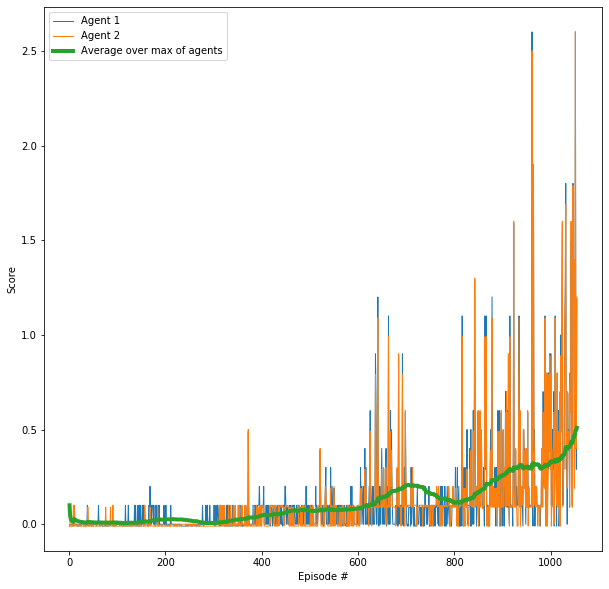

In [6]:
replaybuffer = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, RANDOM_SEED)

agents = MultiagentWrapper(RANDOM_SEED, BATCH_SIZE, replaybuffer)

def ddpg(n_episodes=2000, noise_level=NOISE_LEVEL, noise_decay=NOISE_DECAY):
    total_t = 0
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        states = env_info.vector_observations
        for agent in agents.agents:
            agent.reset()
        
        scores_agents = np.zeros(NUM_AGENTS)
        for t in range(0, 1000):
            total_t += 1
            actions = agents.act(states, noise_level)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished

            scores_agents += np.array(env_info.rewards)
            replaybuffer.add(states, actions, rewards, next_states, dones)
            
            if total_t%UPDATE_INTERVAL==0:
                for _ in range(0, UPDATE_STEPS):
                    agents.learn()

            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        scores_deque.append(np.max(scores_agents)) # as discussed maximum of both agents
        scores.append(np.concatenate((scores_agents, (np.mean(scores_deque),))))
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tNoise Level: {:.2f}'.format(i_episode, np.mean(scores_deque), scores_deque[-1], noise_level))
        else:
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tNoise Level: {:.2f}'.format(i_episode, np.mean(scores_deque), scores_deque[-1], noise_level), end="")
            
        noise_level *= noise_decay

        if np.mean(scores_deque) >= SOLUTION_THRESHOLD:
            print()
            print('Environment solved! Saving agent weights')
            for agentNr in range(0, NUM_AGENTS):
                torch.save(agents.agents[agentNr].actor_local.state_dict(), 'model_weights/checkpoint_actor_{0}.pth'.format(agentNr))
                torch.save(agents.agents[agentNr].critic_local.state_dict(), 'model_weights/checkpoint_critic_{0}.pth'.format(agentNr))
            break

    return scores

scores = ddpg(n_episodes=10000)

fig, ax = plt.subplots(1,1,figsize=(10,10))
for agentNr in range(0, NUM_AGENTS):
    plt.plot(np.arange(1, len(scores)+1), [score[agentNr] for score in scores], label='Agent {}'.format(agentNr+1), linewidth=1)
plt.plot(np.arange(1, len(scores)+1), [score[NUM_AGENTS] for score in scores], label='Average over max of agents', linewidth=4)
plt.ylabel('Score')
plt.xlabel('Episode #')
ax.legend()
plt.show()

### 5. Running the agents

Now we can finally run the agents. If you experience problems with the Unity environment, reset the IPython kernel and execute the cells from the beginning -- without the training step, of course. The following cell reads in the model weights that have been written to the disk lastly.

You can observe the agents in the Unity window. Please note that it is now in full size as opposed to the training step, because we set `train_mode=False` in the call to `env.reset`. Also, when calling the `act` functions of the agents, we choose the `noise_level=0.0`, because this is only helpful when training the agents (think of the similarity to Dropout layers that are only active during training).

In [7]:
replaybuffer = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, RANDOM_SEED)

agents = MultiagentWrapper(RANDOM_SEED, BATCH_SIZE, replaybuffer)

for agentNr in range(0, NUM_AGENTS):
    agents.agents[agentNr].actor_local.load_state_dict(torch.load('model_weights/checkpoint_actor_{0}.pth'.format(agentNr)))
    agents.agents[agentNr].critic_local.load_state_dict(torch.load('model_weights/checkpoint_critic_{0}.pth'.format(agentNr)))

def run_ddpg():
    for episode in range(0, 3):
        print("Running Episode Nr {0}, please check graphical output window".format(episode+1))
        env_info = env.reset(train_mode=False)[brain_name]
        states = env_info.vector_observations
        for agent in agents.agents:
            agent.reset()
        scores_agents = np.zeros(num_agents)
        for t in range(0, 500):
            actions = agents.act(states, 0.0)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores_agents += np.array(env_info.rewards)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
            time.sleep(0.01)
            if t == 499:
                print("Quitting after 500 timesteps so that it doesn't go on forever")
                break
        print("The agents got the following scores: ", scores_agents)
   
run_ddpg()

Running Episode Nr 1, please check graphical output window
Quitting after 500 timesteps so that it doesn't go on forever
The agents got the following scores:  [1.30000002 1.30000002]
Running Episode Nr 2, please check graphical output window
Quitting after 500 timesteps so that it doesn't go on forever
The agents got the following scores:  [1.30000002 1.30000002]
Running Episode Nr 3, please check graphical output window
Quitting after 500 timesteps so that it doesn't go on forever
The agents got the following scores:  [1.30000002 1.30000002]


In [8]:
env.close() # Closes the environment